# Exploratory Data Analysis

## Config

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print('--- Loading the Season Master ---')

LOCAL_DATA_DIR = "archive_data/2024-25"
LOCAL_DATA_FILE = "merged_gw_data.csv"
LOCAL_DATA_PATH = os.path.join(LOCAL_DATA_DIR, LOCAL_DATA_FILE)

print(f"Loading data from: {LOCAL_DATA_PATH}")
df_fpl = pd.read_csv(LOCAL_DATA_PATH)
display(df_fpl.head())
print(f"\n{len(df_fpl)} rows loaded")

print('\n--- Loading the Player Summaries ---')

LOCAL_PLAYER_FILE = "player_summaries.csv"
LOCAL_PLAYER_PATH = os.path.join(LOCAL_DATA_DIR, LOCAL_PLAYER_FILE)

print(f"Loading data from: {LOCAL_PLAYER_PATH}")
df_player_summary = pd.read_csv(LOCAL_PLAYER_PATH)
display(df_player_summary.head())
print(f"\n{len(df_player_summary)} rows loaded")

--- Loading the Season Master ---
Loading data from: archive_data/2024-25/merged_gw_data.csv


,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,gameweek
0,Alex Scott,MID,Bournemouth,1.6,0,0,11,0,12.8,77,...,1,0.0,2,0,0,0,50,False,0,1
1,Carlos Miguel dos Santos Pereira,GK,Nott'm Forest,2.2,0,0,0,0,0.0,427,...,1,0.0,0,0,0,0,45,True,0,1
2,Tomiyasu Takehiro,DEF,Arsenal,0.0,0,0,0,0,0.0,22,...,2,0.0,0,0,0,0,50,True,0,1
3,Malcolm Ebiowei,MID,Crystal Palace,0.0,0,0,0,0,0.0,197,...,2,0.0,0,0,0,0,45,False,0,1
4,Ben Brereton Díaz,MID,Southampton,1.0,0,0,-2,0,14.0,584,...,1,16.0,1,0,0,0,55,False,1,1



27605 rows loaded

--- Loading the Player Summaries ---
Loading data from: archive_data/2024-25/player_summaries.csv


,assists,birth_date,bonus,bps,can_select,can_transact,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,clean_sheets_per_90,...,threat_rank_type,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
0,0,NaN,0,0,False,True,0.0,0.0,0,0.00,...,341,0,439,0,2825,0,0.0,0.0,Fábio Vieira,0
1,2,1997-04-03,6,152,False,True,0.0,0.0,2,0.30,...,32,42,1238437,0,1409940,0,0.0,6.5,G.Jesus,4
2,2,1997-12-19,9,459,False,True,0.0,0.0,10,0.38,...,11,117,5093448,0,5431768,0,0.0,19.2,Gabriel,4
3,3,1999-06-11,14,343,False,True,100.0,100.0,7,0.34,...,15,97,2644355,0,3530099,0,0.0,12.6,Havertz,5
4,0,NaN,0,0,False,True,0.0,0.0,0,0.00,...,38,0,0,0,4643,0,0.0,0.0,Hein,0



804 rows loaded


## Initial Inspection/Visuals

In [3]:
#print("--- Basic DataFrame Information | Master ---")
#print("\nDataFrame Info:")
#df_fpl.info()

#print("\nMissing Values per Column:")
#display(df_fpl.isnull().sum()[df_fpl.isnull().sum() > 0].sort_values(ascending=False))

#print("\nColumn Names:")
#print(df_fpl.columns.tolist())

print("\n---- Basic DataFrame Information | Players ----")
print("\n-- DataFrame Info:")
df_player_summary.info()

print("\n-- Missing Values per Column:")
display(df_player_summary.isnull().sum()[df_player_summary.isnull().sum() > 0].sort_values(ascending=False))

print("\n-- Column Names:")
print(df_player_summary.columns.tolist())

print("\n-- Sample:")
df_player_summary.head(5)


---- Basic DataFrame Information | Players ----

-- DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Columns: 103 entries, assists to yellow_cards
dtypes: bool(6), float64(33), int64(54), object(10)
memory usage: 614.1+ KB

-- Missing Values per Column:


corners_and_indirect_freekicks_text     804
direct_freekicks_text                   804
squad_number                            804
penalties_text                          804
penalties_order                         754
direct_freekicks_order                  739
corners_and_indirect_freekicks_order    729
news                                    561
news_added                              201
chance_of_playing_next_round            201
chance_of_playing_this_round            201
birth_date                              162
team_join_date                           99
region                                   98
ep_next                                   3
dtype: int64


-- Column Names:
['assists', 'birth_date', 'bonus', 'bps', 'can_select', 'can_transact', 'chance_of_playing_next_round', 'chance_of_playing_this_round', 'clean_sheets', 'clean_sheets_per_90', 'code', 'corners_and_indirect_freekicks_order', 'corners_and_indirect_freekicks_text', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'creativity', 'creativity_rank', 'creativity_rank_type', 'direct_freekicks_order', 'direct_freekicks_text', 'dreamteam_count', 'element_type', 'ep_next', 'ep_this', 'event_points', 'expected_assists', 'expected_assists_per_90', 'expected_goal_involvements', 'expected_goal_involvements_per_90', 'expected_goals', 'expected_goals_conceded', 'expected_goals_conceded_per_90', 'expected_goals_per_90', 'first_name', 'form', 'form_rank', 'form_rank_type', 'goals_conceded', 'goals_conceded_per_90', 'goals_scored', 'has_temporary_code', 'ict_index', 'ict_index_rank', 'ict_index_rank_type', 'id', 'in_dreamteam', 'influence', 'inf

,assists,birth_date,bonus,bps,can_select,can_transact,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,clean_sheets_per_90,...,threat_rank_type,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
0,0,NaN,0,0,False,True,0.0,0.0,0,0.00,...,341,0,439,0,2825,0,0.0,0.0,Fábio Vieira,0
1,2,1997-04-03,6,152,False,True,0.0,0.0,2,0.30,...,32,42,1238437,0,1409940,0,0.0,6.5,G.Jesus,4
2,2,1997-12-19,9,459,False,True,0.0,0.0,10,0.38,...,11,117,5093448,0,5431768,0,0.0,19.2,Gabriel,4
3,3,1999-06-11,14,343,False,True,100.0,100.0,7,0.34,...,15,97,2644355,0,3530099,0,0.0,12.6,Havertz,5
4,0,NaN,0,0,False,True,0.0,0.0,0,0.00,...,38,0,0,0,4643,0,0.0,0.0,Hein,0


Since the project is looking retrospectively at the season, and, for example, not using it to pick players next week, we can remove some columns that are unnecessary. 

In [4]:
df_player_summary.drop(columns=['can_select', 'can_transact', 'chance_of_playing_next_round', 'chance_of_playing_this_round', 
                                'corners_and_indirect_freekicks_text', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 
                                'direct_freekicks_text', 'dreamteam_count',
                                'has_temporary_code', 'news', 'news_added',
                                'photo', 'code', 'transfers_in_event', 'transfers_out_event'],
                                inplace=True)
print("\n-- New Data: ")
df_player_summary.head(5)




-- New Data: 


,assists,birth_date,bonus,bps,clean_sheets,clean_sheets_per_90,corners_and_indirect_freekicks_order,creativity,creativity_rank,creativity_rank_type,...,threat,threat_rank,threat_rank_type,total_points,transfers_in,transfers_out,value_form,value_season,web_name,yellow_cards
0,0,NaN,0,0,0,0.00,NaN,0.0,795,343,...,0.0,791,341,0,439,2825,0.0,0.0,Fábio Vieira,0
1,2,1997-04-03,6,152,2,0.30,NaN,119.5,276,31,...,255.0,134,32,42,1238437,1409940,0.0,6.5,G.Jesus,4
2,2,1997-12-19,9,459,10,0.38,NaN,208.8,202,45,...,287.0,120,11,117,5093448,5431768,0.0,19.2,Gabriel,4
3,3,1999-06-11,14,343,7,0.34,NaN,269.0,161,18,...,711.0,34,15,97,2644355,3530099,0.0,12.6,Havertz,5
4,0,NaN,0,0,0,0.00,NaN,0.0,599,57,...,0.0,558,38,0,0,4643,0.0,0.0,Hein,0


In the same vein, filtering out players who did not play a substantial part of the season, means we can help remove outliers and only use players with sufficient data. By selecting players with more than 1000 minutes, they must have player ~10 games, or just over a quarter of the 38 game season.

In [5]:
df_player_summary = df_player_summary[df_player_summary['minutes'] > 1000].copy()

print(f"Filtered to the {df_player_summary.shape[0]} players who played > 1000 minutes.")

Filtered to the 305 players who played > 1000 minutes.


### Top Point Scorers


--- Top 20 Points Scorers for 2024-25 ---


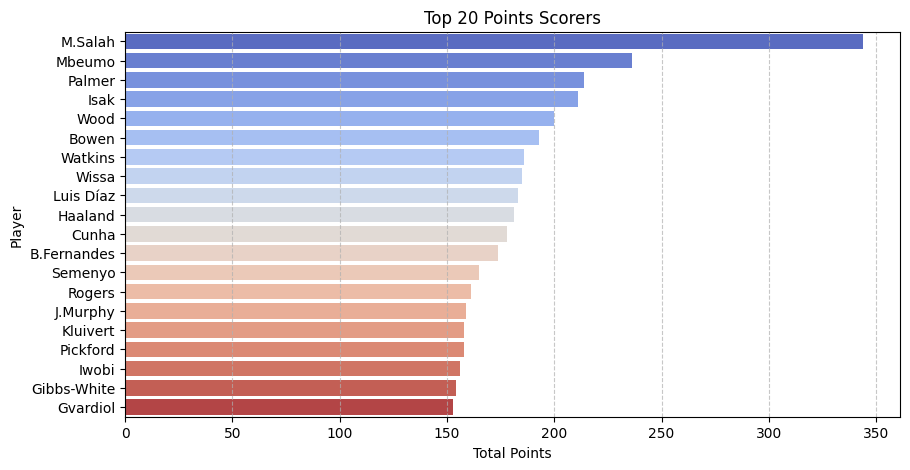

In [6]:
print("\n--- Top 20 Points Scorers for 2024-25 ---")

top_20_points = df_player_summary.sort_values(by='total_points', ascending=False)[:20]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_20_points['total_points'], y=top_20_points['web_name'], palette='coolwarm', hue=top_20_points['web_name'], legend=False)
plt.title("Top 20 Points Scorers")
plt.ylabel('Player')
plt.xlabel('Total Points')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Player Final Cost vs Total Points Scored


--- Player Final Cost vs Total Points Scored ---


<Figure size 1000x1000 with 0 Axes>

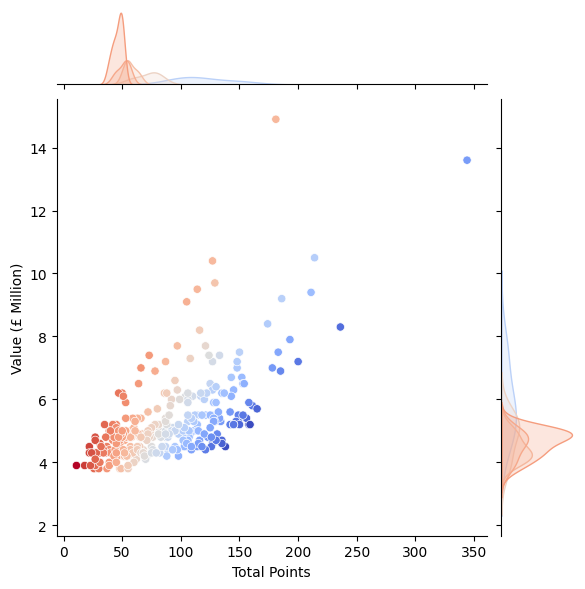

In [7]:
print("\n--- Player Final Cost vs Total Points Scored ---")


df_plot_data = df_player_summary.copy()
df_plot_data['cost_in_m'] = df_player_summary['now_cost']/10
df_plot_data = df_plot_data[df_plot_data['minutes'] > 1000]
df_plot_data['points_per_mil'] = df_plot_data['total_points']/df_plot_data['cost_in_m']

plt.figure(figsize=(10, 10))
sns.jointplot(x='total_points', y='cost_in_m', data=df_plot_data, palette='coolwarm_r', hue='points_per_mil', legend=False)
plt.ylabel('Value (£ Million)')
plt.xlabel('Total Points')
plt.show()

### Player Position Exploration

In [8]:
position_map = {
    1: 'GK',
    2: 'DEF',
    3: 'MID',
    4: 'FWD'
}
df_player_summary['position'] = df_player_summary['element_type'].map(position_map)

print("\n-- Position Added")
print(df_player_summary[['web_name', 'element_type', 'position']].head())

## Define the order for the positions;
desired_order_pos = ['GK', 'DEF', 'MID', 'FWD']

df_player_summary['position'] = pd.Categorical(
    df_player_summary['position'],
    categories=desired_order_pos,
    ordered=True
)


-- Position Added
     web_name  element_type position
2     Gabriel             2      DEF
3     Havertz             4      FWD
5    J.Timber             2      DEF
7      Kiwior             2      DEF
8  Martinelli             3      MID


Text(0, 0.5, 'Points Per Game')

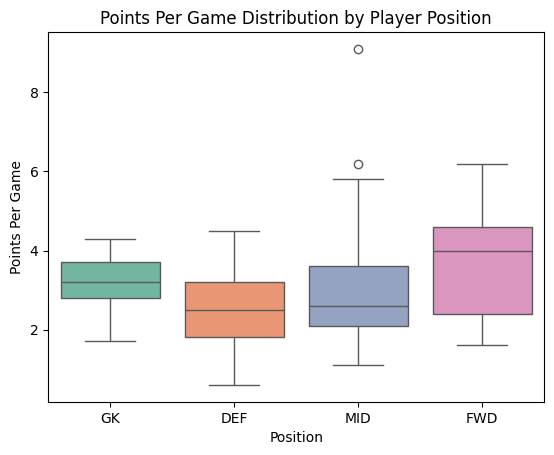

In [9]:
plt.Figure(figsize=(10,8))

sns.boxplot(data=df_player_summary, 
            x='position', 
            y='points_per_game',
            palette='Set2',
            hue='position',
            legend=False)

plt.title('Points Per Game Distribution by Player Position')
plt.xlabel('Position')
plt.ylabel('Points Per Game')

The boxplot shows a high median for the forward position with a large spread, and minus the two outliers in midfield (Salah and Mbeumo), it initially suggests that a strategy more heavily invested in forwards could be rewarding.

Text(0, 0.5, 'Points Per Million £')

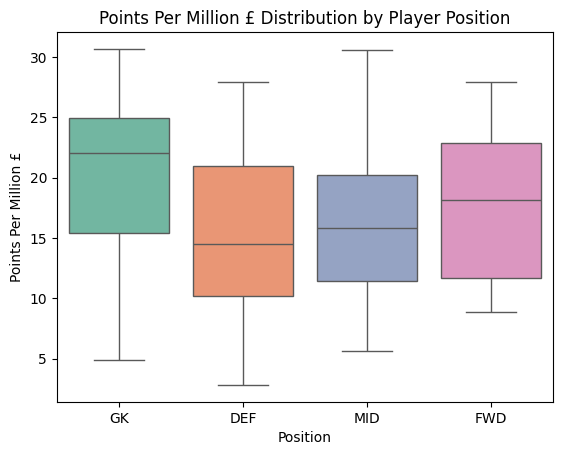

In [10]:
df_plot_data2 = df_player_summary.copy()
df_plot_data2['cost_in_m'] = df_player_summary['now_cost']/10
df_plot_data2 = df_plot_data2[df_plot_data2['minutes'] > 1000]
df_plot_data2['points_per_mil'] = df_plot_data2['total_points']/df_plot_data2['cost_in_m']

plt.Figure(figsize=(10,8))

sns.boxplot(data=df_plot_data2, 
            x='position', 
            y='points_per_mil',
            palette='Set2',
            hue='position',
            legend=False)

plt.title('Points Per Million £ Distribution by Player Position')
plt.xlabel('Position')
plt.ylabel('Points Per Million £')

On further analysis costs also suggest that Forwards are a relatively safe purchase. While they lack the ceiling reached in terms of value compared to Midfield or Goalkeepers, the distribution of points per mil is far smaller than other positions. Therefore they indicate a lower risk investment, and the collective group of players as a whole outperform other positions. Investing long term in a forward suggests that you should be recieving at least, nearly 10 points per million invested, compared to potentials points half of that or less in other areas.

### Correlation Check

Running a correlation check to investigate potential connections between stats, that can then guide further analysis.

In [19]:
# Initial Filtering
df_corr_data = df_player_summary.copy()
df_corr_data = df_corr_data[df_corr_data['minutes'] > 1000]
df_corr_data = df_corr_data[df_corr_data['element_type'] > 1]
df_corr_data['cost_in_m'] = df_player_summary['now_cost']/10
df_corr_data['points_per_mil'] = df_corr_data['total_points']/df_corr_data['cost_in_m']

## Obtain just numeric types in preperation to choose columns to include
numeric_corr_data = df_corr_data.select_dtypes(include=['number'])

print("\n --- Numeric Data Info:")
numeric_corr_data.info()


 --- Numeric Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 2 to 802
Data columns (total 77 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   assists                               282 non-null    int64  
 1   bonus                                 282 non-null    int64  
 2   bps                                   282 non-null    int64  
 3   clean_sheets                          282 non-null    int64  
 4   clean_sheets_per_90                   282 non-null    float64
 5   corners_and_indirect_freekicks_order  65 non-null     float64
 6   creativity                            282 non-null    float64
 7   creativity_rank                       282 non-null    int64  
 8   creativity_rank_type                  282 non-null    int64  
 9   direct_freekicks_order                55 non-null     float64
 10  element_type                          282 non-null    int64  
 11 

In [24]:
## Selecting some choice columns to check correlation
correlation_stats = [
    'total_points',
    'minutes',    
    'points_per_game',
    'cost_in_m',
    'points_per_mil',
    'value_season',
    
    'goals_scored',
    'assists',
    'clean_sheets',
    'goals_conceded',

    'bonus',
    'bps',
      
    'ict_index',
    'creativity',
    'influence',
    'threat',

    'expected_goals_per_90',
    'expected_assists_per_90',
    'expected_goal_involvements_per_90',
]

corr_dat_plot = numeric_corr_data[correlation_stats].copy()
corr_dat_plot.isnull().sum()

total_points                         0
minutes                              0
points_per_game                      0
cost_in_m                            0
points_per_mil                       0
value_season                         0
goals_scored                         0
assists                              0
clean_sheets                         0
goals_conceded                       0
bonus                                0
bps                                  0
ict_index                            0
creativity                           0
influence                            0
threat                               0
expected_goals_per_90                0
expected_assists_per_90              0
expected_goal_involvements_per_90    0
dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0.5, 0, 'total_points'),
  Text(1.5, 0, 'minutes'),
  Text(2.5, 0, 'points_per_game'),
  Text(3.5, 0, 'cost_in_m'),
  Text(4.5, 0, 'points_per_mil'),
  Text(5.5, 0, 'value_season'),
  Text(6.5, 0, 'goals_scored'),
  Text(7.5, 0, 'assists'),
  Text(8.5, 0, 'clean_sheets'),
  Text(9.5, 0, 'goals_conceded'),
  Text(10.5, 0, 'bonus'),
  Text(11.5, 0, 'bps'),
  Text(12.5, 0, 'ict_index'),
  Text(13.5, 0, 'creativity'),
  Text(14.5, 0, 'influence'),
  Text(15.5, 0, 'threat'),
  Text(16.5, 0, 'expected_goals_per_90'),
  Text(17.5, 0, 'expected_assists_per_90'),
  Text(18.5, 0, 'expected_goal_involvements_per_90')])

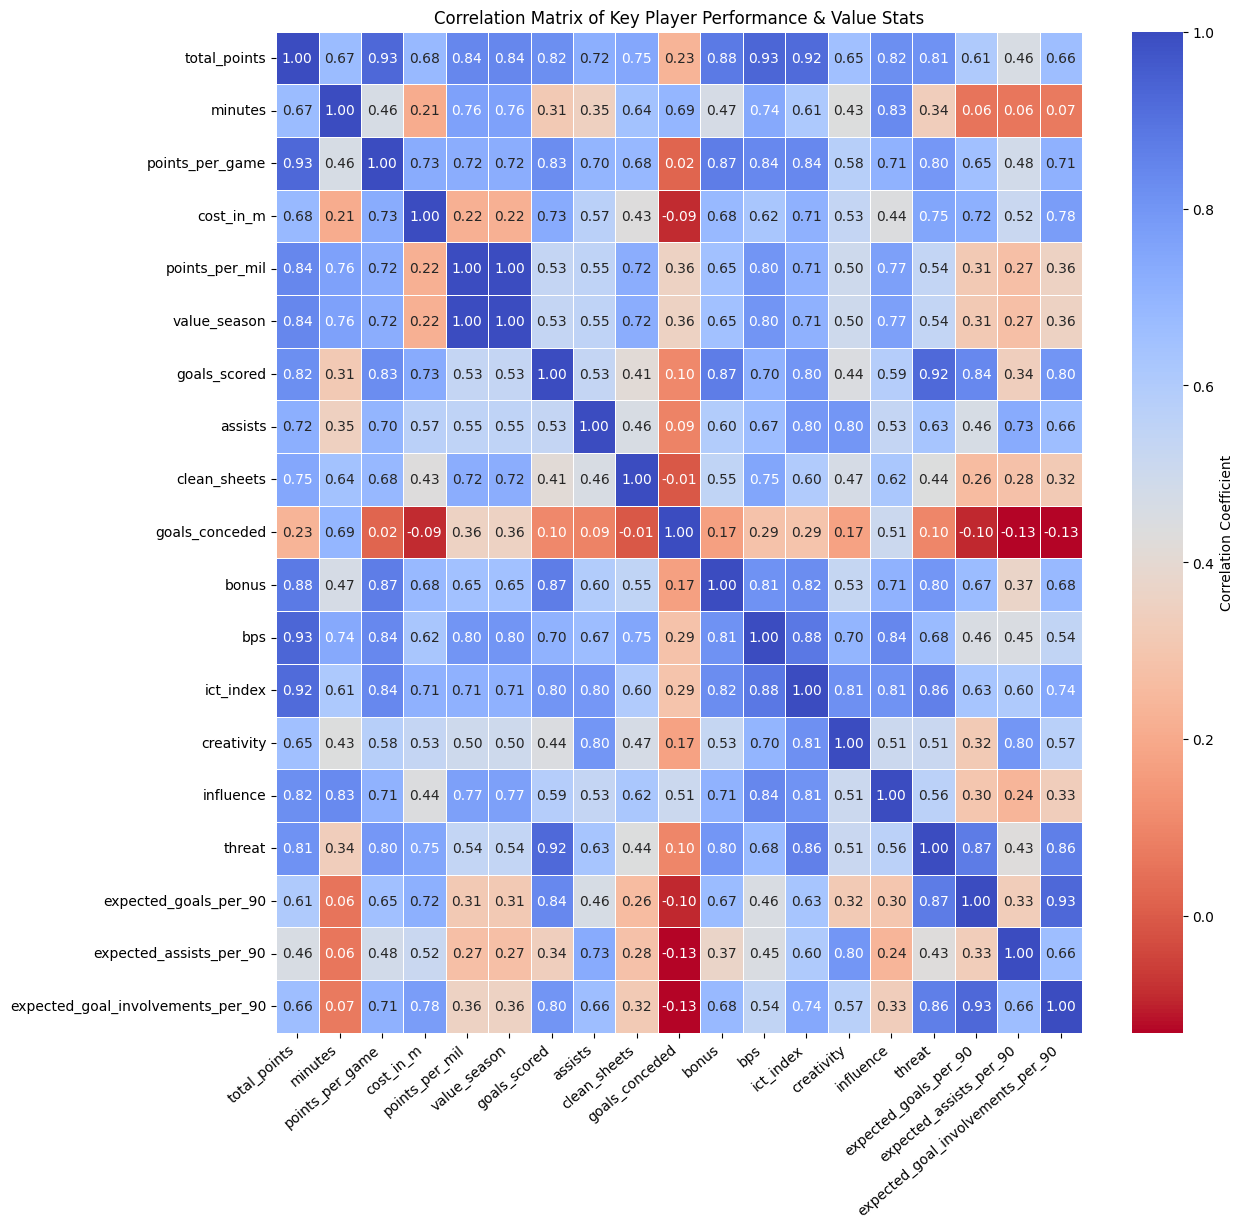

In [35]:
corr_matrix = corr_dat_plot.corr()

plt.figure(figsize=(13,13,))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm_r',
    fmt=".2f",
    linewidths=.7,
    cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of Key Player Performance & Value Stats')
plt.xticks(rotation=40, ha='right')